In [37]:
# The madelon_analyzer includes all of the imports and the madelone_analyzer class that has all functions I've 
# been using for analysis.
%run madelon_analyzer

# contains the train, test, and val sets as dataframes, as well as lists of features found during the feature 
# importance section
%run Expanded_madelon_dataframes_and_features.py

%matplotlib inline

In [6]:
train_df = results_103_100000rows_df.iloc[:20000,:]
val_df = results_103_100000rows_df.iloc[20000:26000,:]

In [7]:
MA = madelon_analyzer(train_df,val_df)

In [8]:
MA_20000_score_df = MA.mean_r2_for_all_features(train_df, DecisionTreeRegressor)

In [22]:
new_MA_20000_score_df = MA_20000_score_df[:25]
new_MA_20000_score_df['feature'] = train_df[MA_20000_score_df[:25].index].columns

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
new_MA_20000_score_df

,r2_score,feature
67,0.990509,feat_639
97,0.988641,feat_956
23,0.985173,feat_269
87,0.980179,feat_867
36,0.979375,feat_341
43,0.976142,feat_395
93,0.970617,feat_920
73,0.967101,feat_724
71,0.966585,feat_701
31,0.964912,feat_315


In [32]:
my_features = train_df[MA_20000_score_df[:20].index].columns
my_features

Index(['feat_639', 'feat_956', 'feat_269', 'feat_867', 'feat_341', 'feat_395',
       'feat_920', 'feat_724', 'feat_701', 'feat_315', 'feat_336', 'feat_736',
       'feat_257', 'feat_808', 'feat_504', 'feat_769', 'feat_829', 'feat_308',
       'feat_526', 'feat_681'],
      dtype='object')

In [34]:
MA.train_val_scorer_df_maker(my_features, 'my_features').T

,train_score,val_score
my_features,0.8802,0.830333


In [29]:
X_train = results_103_100000rows_df[my_features][:10000]
X_val = results_103_100000rows_df[my_features][10000:13000]
y_train = results_103_100000rows_df['target'][:10000]
y_val = results_103_100000rows_df['target'][10000:13000]

knc_params = {
    'n_neighbors':range(3,30,2),
    'p':[1,2]
    
}

rf_params = {
    'criterion':['gini','entropy'],
    'max_depth':[None,2,3,4,5,20,100],
    
}

knc_roc = GridSearchCV(KNeighborsClassifier(n_jobs=-1), knc_params)
rf_roc = GridSearchCV(RandomForestClassifier(n_jobs=-1), rf_params)

rf_roc.fit(X_train, y_train)
knc_roc.fit(X_train, y_train)

y_preds = knc_roc.predict(X_val)
y_proba = knc_roc.predict_proba(X_val)

y_preds_rf = rf_roc.predict(X_val)
y_proba_rf = rf_roc.predict_proba(X_val)

print('KNC Score: {}  | RandomForest Score: '\
      .format(roc_auc_score(y_val, y_preds), roc_auc_score(y_val, y_preds_rf)))
print('\n_____________________________\n')
print('KNC params: {}  | RandomForest params: '\
      .format(knc_roc.best_params_, rf_roc.best_params_))

In [30]:
roc_auc_score(y_val, y_preds), roc_auc_score(y_val, y_preds_rf)

(0.80964229887673123, 0.79238014516760602)

In [31]:
rf_roc.best_params_, knc_roc.best_params_

({'criterion': 'gini', 'max_depth': 20}, {'n_neighbors': 7, 'p': 2})

In [38]:
MA.train_val_scorer_df_maker(feats_extracted_from_10000_samp_r2, 'feats_extracted_from_10000_samp_r2')

,feats_extracted_from_10000_samp_r2
train_score,0.880200
val_score,0.830333


In [50]:
rf_params = {
    'criterion':['entropy'],
    'max_depth':[20,30,40,50],
    
}

feats_extracted_from_10000_samp_train_val_score = MA.train_val_scorer_df_maker(feats_extracted_from_10000_samp_r2, 'feats_extracted_from_10000_samp_r2', \
                            KNeighborsClassifier, knc_params)

In [51]:
feats_extracted_from_10000_samp_train_val_score

,feats_extracted_from_10000_samp_r2
train_score,0.871000
val_score,0.828333


In [52]:
MA.best_params_

{'n_neighbors': 7, 'p': 2}

## Feature Importance

In [125]:
feats_extracted_from_10000_samp_r2 = ['feat_639', 'feat_956', 'feat_269', 'feat_867', 'feat_341', 'feat_395',
       'feat_920', 'feat_724', 'feat_701', 'feat_315', 'feat_336', 'feat_736',
       'feat_257', 'feat_808', 'feat_504', 'feat_769', 'feat_829', 'feat_308',
       'feat_526', 'feat_681']

second_best_score_ = \
['feat_920',
 'feat_681',
 'feat_736',
 'feat_808',
 'feat_701',
 'feat_257',
 'feat_526',
 'feat_829',
 'feat_724',
 'feat_269',
 'feat_395',
 'feat_341',
 'feat_308'] # val .833833

best_score_ = \
['feat_867',
 'feat_526',
 'feat_920',
 'feat_829',
 'feat_395',
 'feat_269',
 'feat_639',
 'feat_681',
 'feat_504',
 'feat_808',
 'feat_724',
 'feat_769',
 'feat_308',
 'feat_956'] # val .83450

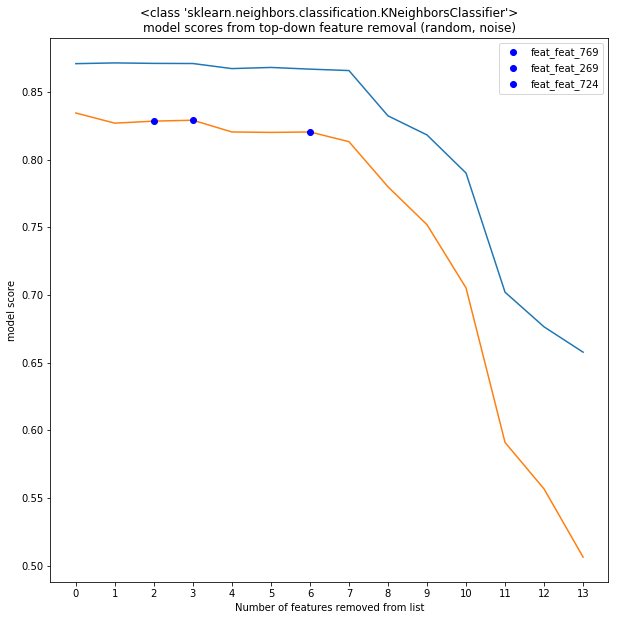

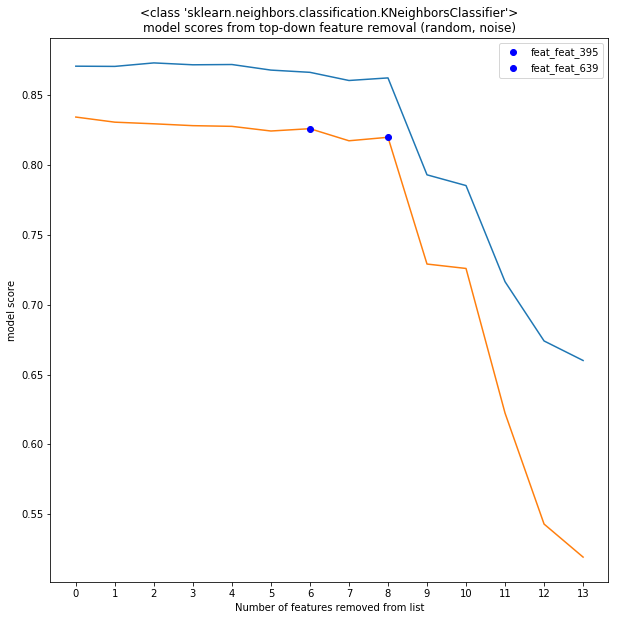

TOP RANDOMIZED NOISE FEATURES: ['feat_269', 'feat_395', 'feat_639', 'feat_724', 'feat_769']


In [123]:
fi_scores_bd_RFE_cols = MA.list_top_dipped_feats(best_score_,\
                                            KNeighborsClassifier,\
                                            params={'n_neighbors':[7]},\
                                            noise=True,\
                                            random=True,\
                                            n_feats_return=3)

In [126]:
good_cols = MA.removerizer(feats_extracted_from_10000_samp_r2, fi_scores_bd_RFE_cols)
good_cols_df = MA.train_val_scorer_df_maker(good_cols, 'with_noise_removal', params={'n_neighbors':[7]})
good_cols_df

,with_noise_removal
train_score,0.869850
val_score,0.829667


In [ ]:
MA.best_params_

In [ ]:
good_cols

In [88]:
good_cols_df = MA.train_val_scorer_df_maker(second_best_score_, 'real_feats', params={'n_neighbors':range(3,20,2)})
good_cols_df

,real_feats
train_score,0.863400
val_score,0.833833


In [110]:
MA_bf = MA.brute_force_feature_combination_score_generator(best_score_, KNeighborsClassifier, n_feats=5, \
                                                          params={'n_neighbors':[7]})

Number of combinations: 1287


In [111]:
MA_bf.head()

,features,train_score,val_score
"['feat_920', 'feat_681', 'feat_736', 'feat_808', 'feat_526']","[feat_920, feat_681, feat_736, feat_808, feat_...",0.8685,0.8365
"['feat_920', 'feat_681', 'feat_736', 'feat_257', 'feat_526']","[feat_920, feat_681, feat_736, feat_257, feat_...",0.87335,0.835167
"['feat_920', 'feat_681', 'feat_808', 'feat_526', 'feat_395']","[feat_920, feat_681, feat_808, feat_526, feat_...",0.87,0.8335
"['feat_681', 'feat_736', 'feat_808', 'feat_526', 'feat_829']","[feat_681, feat_736, feat_808, feat_526, feat_...",0.8688,0.833333
"['feat_681', 'feat_736', 'feat_701', 'feat_257', 'feat_341']","[feat_681, feat_736, feat_701, feat_257, feat_...",0.8709,0.833167


In [116]:
X_train = results_103_100000rows_df[MA_bf['features'][0]][:10000]
X_val = results_103_100000rows_df[MA_bf['features'][0]][10000:13000]
y_train = results_103_100000rows_df['target'][:10000]
y_val = results_103_100000rows_df['target'][10000:13000]

knc_params = {
    'n_neighbors':range(3,30,2),
    'p':[1,2]
    
}

rf_params = {
    'criterion':['gini','entropy'],
    'max_depth':[None,2,3,4,5,20,100],
    
}

knc_roc = GridSearchCV(KNeighborsClassifier(n_jobs=-1), knc_params)
rf_roc = GridSearchCV(RandomForestClassifier(n_jobs=-1), rf_params)

rf_roc.fit(X_train, y_train)
knc_roc.fit(X_train, y_train)

y_preds = knc_roc.predict(X_val)
y_proba = knc_roc.predict_proba(X_val)

y_preds_rf = rf_roc.predict(X_val)
y_proba_rf = rf_roc.predict_proba(X_val)

print('KNC Score:{}  | RandomForest Score:{}'\
      .format(roc_auc_score(y_val, y_preds), roc_auc_score(y_val, y_preds_rf)))
print('\n_____________________________\n')
print('KNC params:{}  | RandomForest params:{}'\
      .format(knc_roc.best_params_, rf_roc.best_params_))

KNC Score:0.8139772821719228  | RandomForest Score:0.7721288152497543

_____________________________

KNC params:{'n_neighbors': 5, 'p': 2}  | RandomForest params:{'criterion': 'gini', 'max_depth': 100}
